# PROYECTO 4
Universidad del Rosario

Estefanía Laverde, Maria Fernanda Palacio, Sebastián Suárez

In [239]:
#Librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics 
import joblib as jb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

Se guardan las imagenes con un label para entrenar el modelo de SVC. Las entradas del modelo serán los histogramas con los valores de la imagen en el espacio de color LAB, pues este ha mostrado dar los mejores resultados (comparado con RGB y HSV).

Una vez se tiene el modelo entrenado, se procede a predecir unas imágenes de testeo.

In [240]:
#Paths de imagenes
glass = ['glass100.jpg','glass113.jpg','glass124.jpg','glass118.jpg','glass123.jpg']
metal = ['metal100.jpg','metal102.jpg']
organic = ['organic1.jpg','organic4.jpg','trash101.jpg','trash55.jpg','trash7.jpg']
paper = ['paper101.jpg','paper106.jpg']
plastic = ['plastic10.jpg','plastic103.jpg','plastic109.jpg','plastic151.jpg','plastic116.jpg','plastic130.jpg']
paquetes = ['trash27.jpg','trash36.jpg','trash111.jpg','trash115.jpg']

total_basura = glass+metal+organic+paper+plastic+paquetes

lista_histogramas = []
lista_etiquetas = ['aprovechable','aprovechable','aprovechable','aprovechable','aprovechable',
                    'aprovechable','aprovechable',
                    'organico','organico','organico','organico','organico',
                    'aprovechable','aprovechable',
                    'no aprovechable','no aprovechable','no aprovechable','no aprovechable','no aprovechable','no aprovechable',
                    'no aprovechable','no aprovechable','no aprovechable','no aprovechable']


#Guardar histogramas
for trash in total_basura:
    #Open images
    path = 'images/'+trash
    image = cv2.imread(path)

    #Use LAB and separate to obtain value
    labImage = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(labImage)
    l = np.ravel(l)
    a = np.ravel(a)
    b = np.ravel(b)

    #Save histograms
    histograma = np.concatenate((np.histogram(l)[0],np.histogram(a)[0],np.histogram(b)[0]))

    #Save histograms
    #histograma = np.concatenate((np.histogram(l)[0],np.histogram(a)[0],np.histogram(b)[0],np.histogram(h)[0],np.histogram(s)[0],np.histogram(v)[0]))
    lista_histogramas.append(histograma)
    

In [241]:
#Make model
model = SVC(C=10)

#Train model
trained_model = model.fit(lista_histogramas,lista_etiquetas)

#Save trained_model
jb.dump(trained_model,'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [242]:
#Cargar modelo
loaded_model = jb.load('modelo_entrenado.pkl')

#Guardar los datos de testeo
glass_testing = ['glass104.jpg','glass118.jpg']
metal_testing = ['metal113.jpg','metal124.jpg']
organic_testing = ['organic2.jpg','organic3.jpg']
paper_testing = ['paper112.jpg','paper122.jpg']
plastic_testing = ['trash108.jpg','plastic122.jpg']

total_basura_predict = glass_testing+metal_testing+organic_testing+paper_testing+plastic_testing
labels_predic = ['aprovechable','aprovechable','aprovechable','aprovechable',
                'organico','organico','aprovechable','aprovechable','no aprovechable','no aprovechable']

#Guardar histogramas
predict_histogramas = []

for trash in total_basura_predict:
    #Open images
    path = 'testing/'+trash
    image = cv2.imread(path)

    #Use LAB and separate to obtain value
    labImage = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(labImage)
    l = np.ravel(l)
    a = np.ravel(a)
    b = np.ravel(b)   

    #Save histograms
    histograma = np.concatenate((np.histogram(l)[0],np.histogram(a)[0],np.histogram(b)[0]))
    predict_histogramas.append(histograma)

#Predicción
predictions = loaded_model.predict(predict_histogramas)
print(predictions)

['aprovechable' 'aprovechable' 'aprovechable' 'no aprovechable' 'organico'
 'organico' 'aprovechable' 'aprovechable' 'no aprovechable' 'aprovechable']


In [243]:
#Medidas
precision_general = metrics.precision_score(labels_predic, predictions,average="macro")  # Se calcula la precision general por metodo
cobertura_general = metrics.recall_score(labels_predic, predictions, average="macro")  # Se calcula la cobertura general por metodo
f_medida_general = metrics.f1_score(labels_predic, predictions,average="macro")  # Se calcula la fmedida general por metodo

print(precision_general,cobertura_general,f_medida_general)

0.7777777777777778 0.7777777777777778 0.7777777777777778


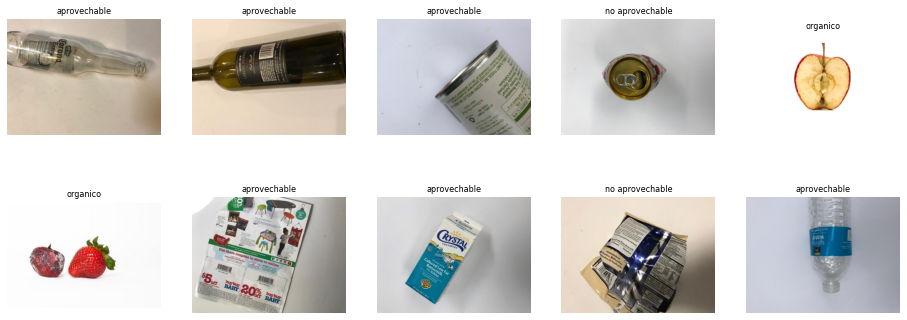

In [244]:
#Categorizar las imagenes
plt.figure(figsize=(16,6))
for i in range(1,len(total_basura_predict)+1):
    #Open images
    image = cv2.imread('testing/'+total_basura_predict[i-1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #Plot
    plt.subplot(2, 5, i)
    plt.imshow(image)
    plt.title(predictions[i-1],size = 8)
    plt.axis('off')

plt.show()

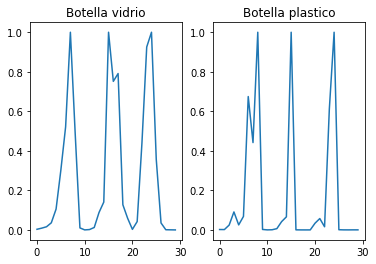

In [245]:
#Histogramas de valores parecidos
path = 'testing/'+'glass104.jpg'
image = cv2.imread(path)

#Use LAB and separate to obtain value
labImage = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(labImage)
l = np.ravel(l)
a = np.ravel(a)
b = np.ravel(b)
    

#Save histograms
histograma1 = np.concatenate((np.histogram(l)[0]/np.max(np.histogram(l)[0]),np.histogram(a)[0]/np.max(np.histogram(a)[0]),np.histogram(b)[0]/np.max(np.histogram(b)[0])))
path = 'testing/'+'plastic122.jpg'
image = cv2.imread(path)
    
#Use LAB and separate to obtain value
labImage = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(labImage)
l = np.ravel(l)
a = np.ravel(a)
b = np.ravel(b)
    

#Save histograms
histograma2 = np.concatenate((np.histogram(l)[0]/np.max(np.histogram(l)[0]),np.histogram(a)[0]/np.max(np.histogram(a)[0]),np.histogram(b)[0]/np.max(np.histogram(b)[0])))

#Plot
plt.subplot(1, 2, 1)
plt.plot(histograma1)
plt.title('Botella vidrio')
plt.subplot(1, 2, 2)
plt.plot(histograma2)
plt.title('Botella plastico')
plt.show()

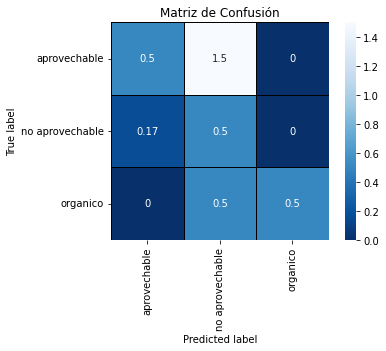

                 precision    recall  f1-score   support

   aprovechable       0.75      0.50      0.60         6
no aprovechable       0.20      0.50      0.29         2
       organico       1.00      0.50      0.67         2

       accuracy                           0.50        10
      macro avg       0.65      0.50      0.52        10
   weighted avg       0.69      0.50      0.55        10

Acurracy: 50.00 %
Cross Validation score: 53.33 %
Standard Deviation: 28.67 % 



In [248]:
#Intento con random forest
def rf_classifier(X_train, Y_train, X_test, Y_test):
    classifier_rf = RandomForestClassifier(
        max_features='log2', n_estimators=100, random_state=0)
    classifier_rf.fit(X_train, Y_train)
    Y_pred_rf = classifier_rf.predict(X_test)
    cm_rf = metrics.confusion_matrix(Y_test, Y_pred_rf)
    acc_rf =metrics.accuracy_score(Y_test, Y_pred_rf)
    accs_rf = cross_val_score(estimator=classifier_rf,X=X_train, y=Y_train, cv=10)
    return classifier_rf, Y_pred_rf, cm_rf, acc_rf, accs_rf

#Matriz de confusión
Colors = ['Blues', 'Blues_r', 'BuPu', 'GnBu', 'PuBu', 'twilight', 'viridis']
color = np.random.choice(Colors)
label_choices = ['aprovechable','no aprovechable','organico']
def Confusion_Matrix_Map(cm):
    sb.heatmap(cm, annot=True, cmap=color, square=True, linewidths=1, linecolor='black',
               xticklabels=label_choices, yticklabels=label_choices)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title("Matriz de Confusión")
    plt.show()

#Clasificación y validación
classifier_rf, Y_pred_rf, cm_rf, acc_rf, accs_rf = rf_classifier(lista_histogramas, lista_etiquetas, predict_histogramas,labels_predic)
Confusion_Matrix_Map(cm_rf/cm_rf.astype(np.float).sum(axis=1))
print(metrics.classification_report(labels_predic, Y_pred_rf,
      target_names=classifier_rf.classes_, zero_division=1))
print("Acurracy: {:.2f} %".format(acc_rf*100))
print("Cross Validation score: {:.2f} %".format(accs_rf.mean()*100))
print("Standard Deviation: {:.2f} %".format(accs_rf.std()*100), '\n')

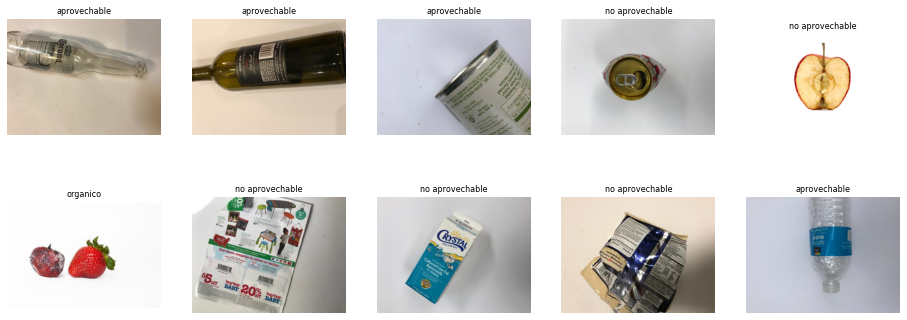

In [247]:
#Imagenes con el random forest
predictions_rf = classifier_rf.predict(predict_histogramas)
#Categorizar las imagenes
plt.figure(figsize=(16,6))
for i in range(1,len(total_basura_predict)+1):
    #Open images
    image = cv2.imread('testing/'+total_basura_predict[i-1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #Plot
    plt.subplot(2, 5, i)
    plt.imshow(image)
    plt.title(predictions_rf[i-1],size = 8)
    plt.axis('off')

plt.show()